In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.math import exp

import matplotlib.pyplot as plt
import numpy as np

In [2]:
!if ! ls /tmp/FOX_train.h5; \
    wget https://repo.gorchilov.net/datasets/fox-multi-factor.tar.gz -O /tmp/fox.tar.gz; \
    tar -xf /tmp/fox.tar.gz -C /tmp; \
    end

import h5py

train = h5py.File('/tmp/FOX_train.h5', mode='r')
test = h5py.File('/tmp/FOX_test.h5', mode='r')

ls: cannot access '/tmp/FOX_train.h5': No such file or directory
--2021-01-11 17:37:33--  https://repo.gorchilov.net/datasets/fox-multi-factor.tar.gz
Resolving repo.gorchilov.net (repo.gorchilov.net)... 185.97.75.52
Connecting to repo.gorchilov.net (repo.gorchilov.net)|185.97.75.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71459054 (68M) [application/octet-stream]
Saving to: ‘/tmp/fox.tar.gz’

/tmp/fox.tar.gz     100%[===================>]  68.15M   108MB/s    in 0.6s    

2021-01-11 17:37:34 (108 MB/s) - ‘/tmp/fox.tar.gz’ saved [71459054/71459054]



In [6]:
train_X = train['data'][:]
train_y = train['labels'][:]

test_X = test['data'][:]
test_y = test['labels'][:]

In [35]:
clear_session()
model = Sequential([
    LSTM(16, input_shape=(4, 1000)),
    Dense(128, activation='relu'),
    Dense(31, activation='relu')
])

In [ ]:
%%time
model.compile(optimizer=Adam(lr=0.001), loss='mse')
history = model.fit(
    train_X, train_y, epochs=1000
)

Epoch 1/1000
3125/3125 [==============================] - 7s 2ms/step - loss: 72072552.0000
Epoch 2/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 72003960.0000
Epoch 3/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 71987720.0000
Epoch 4/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 71992184.0000
Epoch 5/1000
3125/3125 [==============================] - 7s 2ms/step - loss: 71997224.0000
Epoch 6/1000
3125/3125 [==============================] - 7s 2ms/step - loss: 71976016.0000
Epoch 7/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 71971736.0000
Epoch 8/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 71940744.0000
Epoch 9/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 71886776.0000
Epoch 10/1000
3125/3125 [==============================] - 7s 2ms/step - loss: 71819888.0000
Epoch 11/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 

3125/3125 [==============================] - 6s 2ms/step - loss: 34504560.0000
Epoch 90/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 34067612.0000
Epoch 91/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 33712536.0000
Epoch 92/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 33216428.0000
Epoch 93/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 32928616.0000
Epoch 94/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 32470600.0000
Epoch 95/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 32152084.0000
Epoch 96/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 31799482.0000
Epoch 97/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 31394860.0000
Epoch 98/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 31047130.0000
Epoch 99/1000
3125/3125 [==============================] - 9s 3ms/step - loss: 30573

3125/3125 [==============================] - 5s 2ms/step - loss: 14791543.0000
Epoch 177/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 15056958.0000
Epoch 178/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 14629287.0000
Epoch 179/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 14518444.0000
Epoch 180/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 14549422.0000
Epoch 181/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 14259447.0000
Epoch 182/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 14164671.0000
Epoch 183/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 13979778.0000
Epoch 184/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 14022329.0000
Epoch 185/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 13794428.0000
Epoch 186/1000
3125/3125 [==============================] - 5s 2ms/step - l

3125/3125 [==============================] - 5s 2ms/step - loss: 9612419.0000
Epoch 264/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 9720779.0000
Epoch 265/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 9513081.0000
Epoch 266/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 9581832.0000
Epoch 267/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 9427190.0000
Epoch 268/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 9417589.0000
Epoch 269/1000
3125/3125 [==============================] - 6s 2ms/step - loss: 9661033.0000
Epoch 270/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 10777888.0000
Epoch 271/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 10014405.0000
Epoch 272/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 9488869.0000
Epoch 273/1000
3125/3125 [==============================] - 5s 2ms/step - loss: 949

In [ ]:
start = 0
end = 1000

plt.title('all epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(start, end), history.history['loss'][start:end])
plt.show()

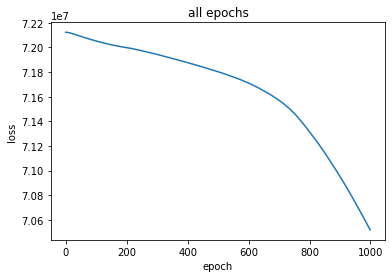

In [17]:
start = 0
end = 1000

plt.title('all epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(start, end), history.history['loss'][start:end])
plt.show()

In [24]:
from evaluate import AUC

AUC(model, test_X, test_y)

{'true positive': 5855, 'false positive': 4145}

In [26]:
model.save('model_saves/lstm.h5')